
# 🔹 K-NN Classification
- A dataset is fitted to the classifier separating **labels and value**
- Distance of a **given data point** is measured from each of the **trained data points**
- **K nearest trained data points** to the test data point are selected as **K nearest neighbors**
- Applying **majority voting** appropriate label for the test data is determined

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

In [44]:
training_data = [[1, 2], [2, 3], [3, 4], [6, 7], [7, 8]]
training_data_df = pd.DataFrame(training_data)
training_labels = ['A', 'A', 'A', 'B', 'B']

test_data = [[2, 2],[3, 5], [6, 6], [8, 9]]
test_data_df = pd.DataFrame(test_data)
test_labels = ['A', 'A', 'B', 'B']

test_points = [[4, 5], [14, 17], [50, 5]]
test_points_df = pd.DataFrame(test_points)

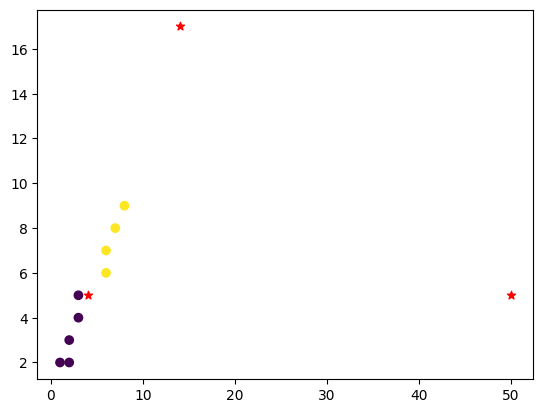

In [45]:
# Visualisation
plt.scatter(training_data_df.iloc[:, 0], training_data_df.iloc[:, 1], c=[0, 0, 0, 1, 1], cmap='viridis')
plt.scatter(test_data_df.iloc[:, 0], test_data_df.iloc[:, 1], c=[0, 0, 1, 1], cmap='viridis')
plt.scatter(test_points_df.iloc[:, 0], test_points_df.iloc[:, 1], c= 'red', marker="*")
plt.show()


# **Step 1** : ***Finding optimal K***
`Elbow method`

In [46]:
test_scores = []
train_scores = []
ks = []

for k in range(2, 6):
    # initiating a clf with training data to cluster k nn
    clf = KNeighborsClassifier(n_neighbors=k).fit(training_data, training_labels)

    # noting train scores -> It tells how well the model has "fit" the data it has already seen.
    train_scores.append(clf.score(training_data, training_labels))
    # noting test scores -> It tells how well the model has predicted the data it has not seen before.
    test_scores.append(clf.score(test_data, test_labels))
    # storing corressponding ks
    ks.append(k)

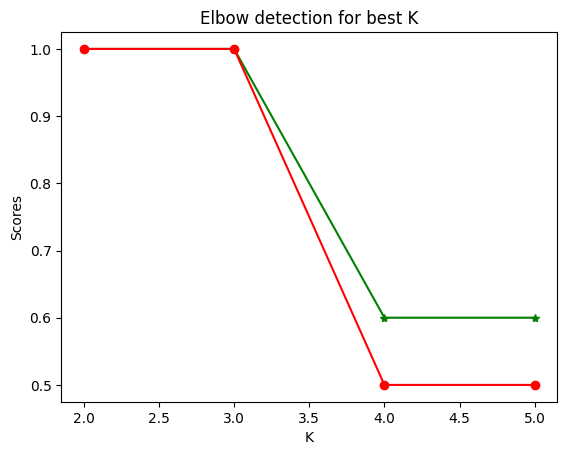

In [47]:
# Visualise the elbow curve
plt.plot(ks, train_scores, marker='*', c='g')
plt.plot(ks, test_scores, marker='o', c= 'r')
plt.ylabel("Scores")
plt.xlabel("K")
plt.title("Elbow detection for best K")
plt.show()

> From the plot it's clear the best k would be **3**

`Before 3` : Model Overfits
`After 3` : Model underfits

`Applying Cross-validation`

In [48]:
from sklearn.model_selection import cross_val_score, LeaveOneOut

In [49]:
cross_scores = []
ks = []

for k in range(2, 5):
    # initiating a k nn model
    clf = KNeighborsClassifier(n_neighbors=k)

    # In each iteration, you leave 1 sample out as the test set, 
    # and use all the remaining n−1 samples as the training set.
    cvs = cross_val_score(clf, training_data, training_labels, cv=LeaveOneOut())
    cross_scores.append(cvs.mean())
    
    # storing corressponding ks
    ks.append(k)

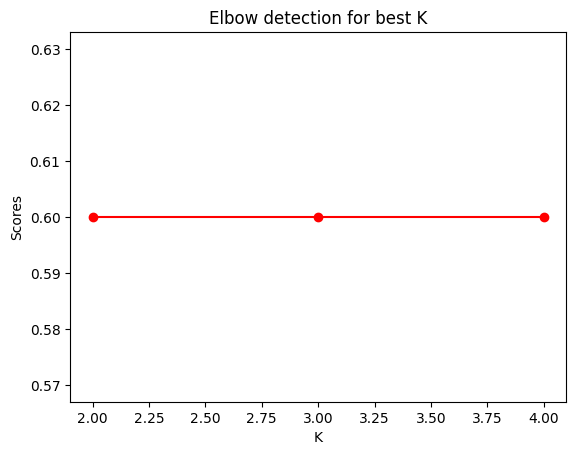

In [50]:
# Visualise the elbow curve
plt.plot(ks, cross_scores, marker='o', c= 'r')
plt.ylabel("Scores")
plt.xlabel("K")
plt.title("Elbow detection for best K")
plt.show()

***Small dataset -> same score***

`Considering both results we can conclude 3 is the best K`

In [ ]:
final_clf = KNeighborsClassifier(n_neighbors=3).fit(training_data, training_labels)


In [ ]:
# predict test data
final_clf.predict(test_data)

array(['A', 'A', 'B', 'B'], dtype='<U1')

In [ ]:
final_clf.predict_proba(test_data,)

array([[1.        , 0.        ],
       [1.        , 0.        ],
       [0.33333333, 0.66666667],
       [0.33333333, 0.66666667]])

In [55]:
final_clf.predict(test_points)

array(['A', 'B', 'B'], dtype='<U1')

In [56]:
final_clf.predict_proba(test_points)

array([[0.66666667, 0.33333333],
       [0.33333333, 0.66666667],
       [0.33333333, 0.66666667]])